In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_openml


In [ ]:
# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()

# Convert labels to integers
y = y.astype(np.int8)


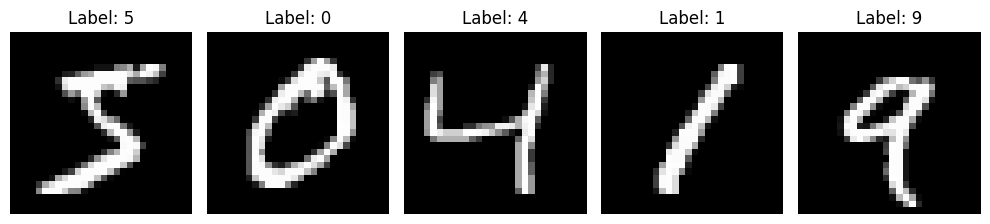

In [ ]:
# Function to display MNIST images
def plot_mnist_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 4))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Select the first three images and labels
num_images_to_display = 5
images_to_display = X[:num_images_to_display]
labels_to_display = y[:num_images_to_display]

# Plot the images
plot_mnist_images(images_to_display, labels_to_display)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


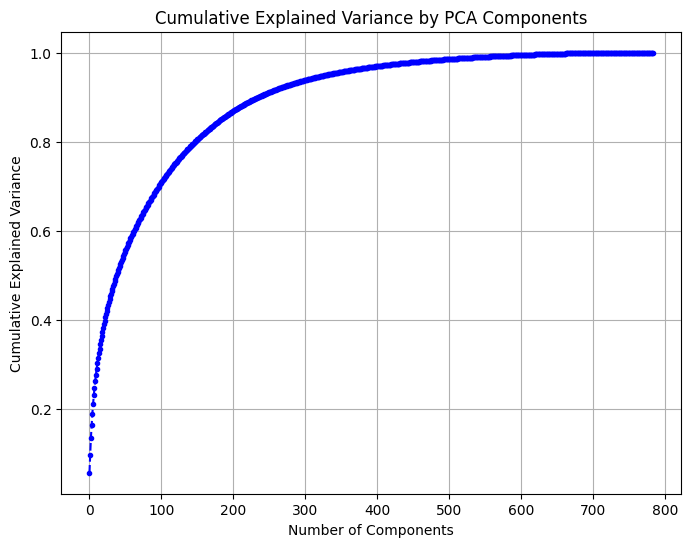

In [ ]:
# Initialize PCA
pca = PCA()

# Fit PCA on the scaled training data
pca.fit(X_train_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='.', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [ ]:
# Choose the number of components to explain 90% variance
cumulative_variance_threshold = 0.9
n_components = np.argmax(np.cumsum(explained_variance_ratio) >= cumulative_variance_threshold) + 1

print(f"Number of components explaining {cumulative_variance_threshold * 100}% variance: {n_components}")


Number of components explaining 90.0% variance: 235


In [ ]:
# Apply PCA with the chosen number of components
pca_optimal = PCA(n_components=n_components)

# Fit PCA on the scaled training data and transform both training and test data
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)


In [ ]:
X_train_pca.shape


(60000, 235)

In [ ]:
# Train RandomForestClassifier on the original data
clf_original = RandomForestClassifier(n_estimators=100, random_state=42)
clf_original.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_original = clf_original.predict(X_test_scaled)

# Evaluate the model
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy before PCA: {accuracy_original:.4f}")

# Classification report
print("Classification Report before PCA:")
print(classification_report(y_test, y_pred_original))


Accuracy before PCA: 0.9675
Classification Report before PCA:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.94      0.97      0.96       967
           3       0.96      0.95      0.95      1034
           4       0.96      0.97      0.97       906
           5       0.98      0.96      0.97       937
           6       0.98      0.99      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.96      0.95      0.96       969
           9       0.96      0.94      0.95      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
# Train RandomForestClassifier on the PCA-transformed data
clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
clf_pca.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred_pca = clf_pca.predict(X_test_pca)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy after PCA: {accuracy_pca:.4f}")

# Classification report
print("Classification Report after PCA:")
print(classification_report(y_test, y_pred_pca))


Accuracy after PCA: 0.9401
Classification Report after PCA:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       983
           1       0.98      0.98      0.98      1152
           2       0.91      0.95      0.93       967
           3       0.91      0.93      0.92      1034
           4       0.93      0.94      0.93       906
           5       0.94      0.91      0.93       937
           6       0.96      0.97      0.96       961
           7       0.94      0.95      0.94      1055
           8       0.94      0.89      0.91       969
           9       0.93      0.90      0.92      1036

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



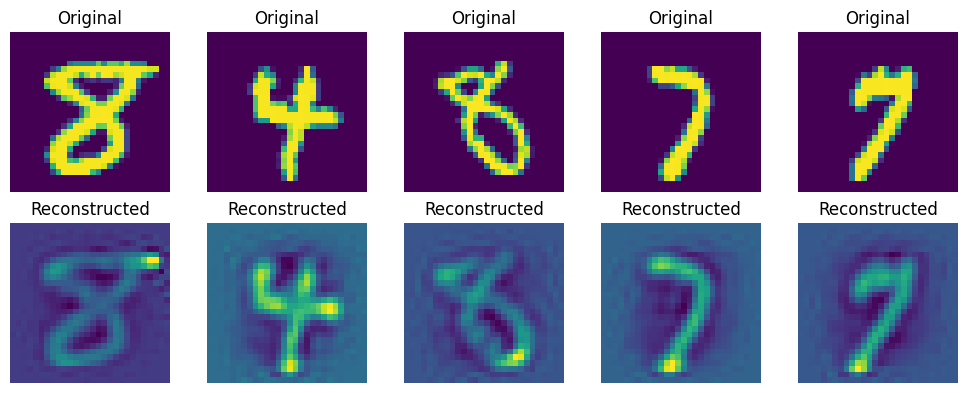

In [ ]:
# Function to plot original and reconstructed images side by side
def plot_mnist_comparison(original_images, reduced_images, num_images=5):
    plt.figure(figsize=(10, 4))

    for i in range(num_images):
        # Original Image
        plt.subplot(2, num_images, i + 1)
        # Access DataFrame rows using .iloc[] for integer-based indexing
        plt.imshow(original_images.iloc[i].values.reshape(28, 28), cmap='viridis')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed Image (after PCA)
        plt.subplot(2, num_images, i + num_images + 1)
        plt.imshow(reduced_images[i].reshape(28, 28), cmap='viridis')
        plt.title("Reconstructed")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
# Use inverse_transform to reconstruct the images from reduced data
X_test_pca_reconstructed = pca_optimal.inverse_transform(X_test_pca)

# Select 5 random images from the test set
num_images_to_display = 5
original_images = X_test[:num_images_to_display]
reduced_images = X_test_pca_reconstructed[:num_images_to_display]

# Plot the original and reconstructed images
plot_mnist_comparison(original_images, reduced_images, num_images=num_images_to_display)


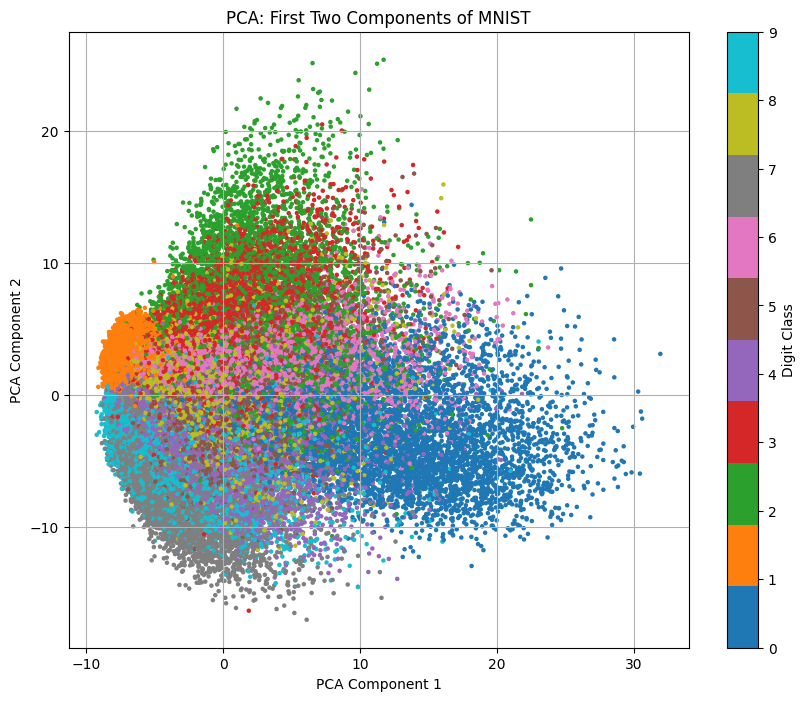

In [ ]:
# Create a scatter plot for the first two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 2], c=y_train, cmap='tab10', s=5)

# Add legend and labels
plt.colorbar(scatter, label='Digit Class')
plt.title('PCA: First Two Components of MNIST')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


In [ ]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
from umap import UMAP

# Initialize UMAP with 2 components for visualization
umap = UMAP(n_components=n_components, random_state=42)

# Fit and transform the data
X_umap = umap.fit_transform(X_train_scaled)
X_tst_umap = umap.transform(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
# Train RandomForestClassifier on the UMAP-reduced data
clf_umap = RandomForestClassifier(n_estimators=100, random_state=42)
clf_umap.fit(X_umap, y_train)

# Predict on the UMAP-reduced test data
y_pred_umap = clf_umap.predict(X_tst_umap)

# Evaluate the model
accuracy_umap = accuracy_score(y_test, y_pred_umap)
print(f"Accuracy after UMAP: {accuracy_umap:.4f}")

# Classification report
print("Classification Report after UMAP:")
print(classification_report(y_test, y_pred_umap))


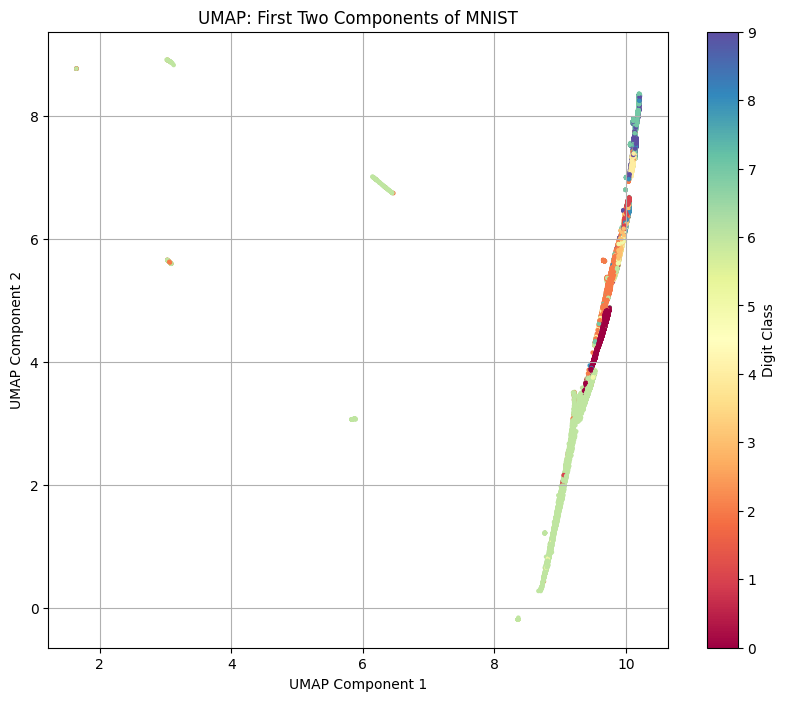

In [ ]:
# Create a scatter plot for the first two UMAP components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap='Spectral', s=5)

# Add legend and labels
plt.colorbar(scatter, label='Digit Class')
plt.title('UMAP: First Two Components of MNIST')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.manifold import TSNE
# Initialize t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the scaled training data
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [ ]:
# Create a scatter plot for the first two t-SNE components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='Spectral', s=5)

# Add legend and labels
plt.colorbar(scatter, label='Digit Class')
plt.title('t-SNE: First Two Components of MNIST')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Initialize LDA with 2 components (since it's a supervised method, it uses labels)
lda = LDA(n_components=2)

# Fit LDA on the scaled training data and labels, and transform the data
X_train_lda = lda.fit_transform(X_train_scaled, y_train)

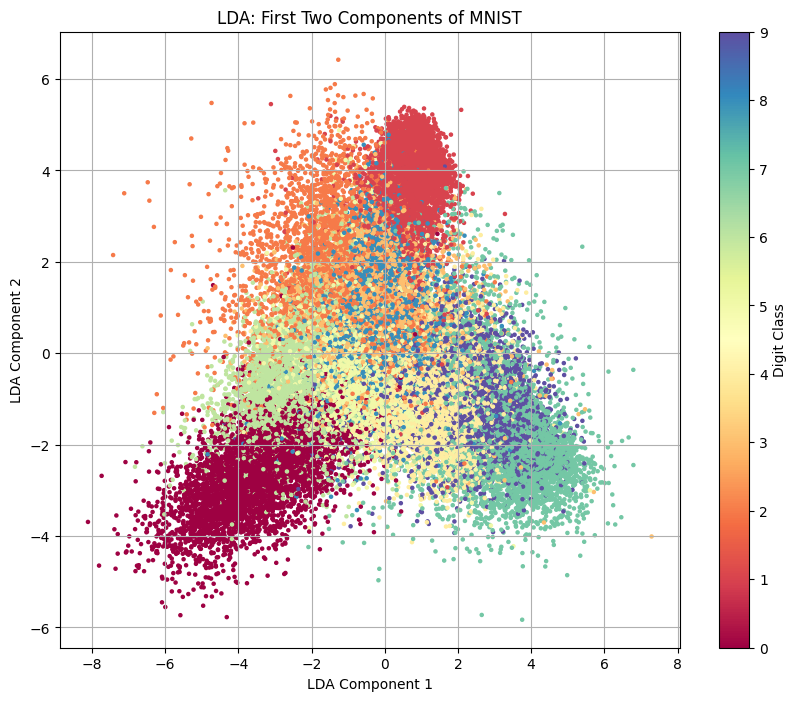

In [ ]:
# Create a scatter plot for the first two LDA components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='Spectral', s=5)

# Add legend and labels
plt.colorbar(scatter, label='Digit Class')
plt.title('LDA: First Two Components of MNIST')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.grid(True)
plt.show()
